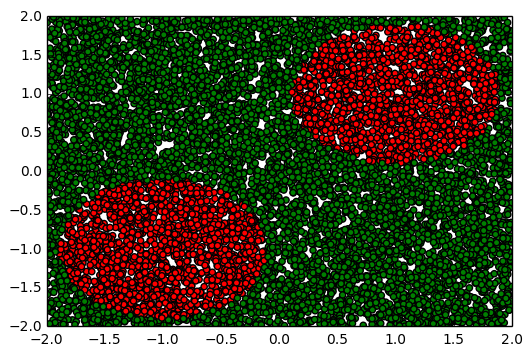

In [47]:
# First I'll generate circle data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_1 = [
    np.random.uniform(-2,2)
    for iter in range(0,10000)
]

x_2 = [
    np.random.uniform(-2,2)
    for iter in range(0,10000)
]

# unit circle with centre at (-1,-1)
x_3 = [(x_1[i]-1)**2 for i in range(len(x_1))]
x_4 = [(x_2[i]-1)**2 for i in range(len(x_1))]
# unit circle with centre at (1,1)
x_5 = [(x_1[i]+1)**2 for i in range(len(x_1))]
x_6 = [(x_2[i]+1)**2 for i in range(len(x_1))]


y = [(x_3[i] + x_4[i]) <= 0.8 or (x_5[i] + x_6[i]) <= 0.8 for i in range(len(x_1))]

plt.scatter(x_2, x_1, c=['red' if i else 'green' for i in y])
plt.ylim([-2,2])
plt.xlim([-2,2])

plt.show()

# Training - Test split

X_train=np.asarray([[x_1[i], x_2[i]] for i in range(int(len(x_1)*0.75))]) 
Y_train=np.asarray([[y[i]] for i in range(int(len(y)*0.75))])

X_test=np.asarray([[x_1[i], x_2[i]] for i in range(int(len(x_1)*0.75),len(x_1))]) 
Y_test=np.asarray([[y[i]] for i in range(int(len(y)*0.75),len(y))])

I'm going to train a KNN classifier an test for accuracy and next I will repeat the same process with an SVM:

KNN model accuracy: 
0.9912


/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


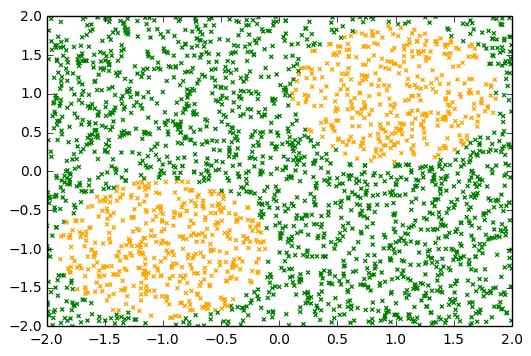

In [42]:
import sklearn.neighbors as knn

print("KNN model accuracy: ")
knnM=knn.KNeighborsClassifier(n_neighbors=5)
knnM.fit(X_train, Y_train)
Y_knn = knnM.predict(X_test)
print(knnM.score(X_test,Y_test))

plt.scatter(X_test[:,0],X_test[:,1],marker ="x",\
            c=['orange' if i==1 else 'green' for i in Y_knn],s=8)
plt.ylim([-2,2])
plt.xlim([-2,2])
plt.show()
plt.clf()

SVM model accuracy: 
0.996


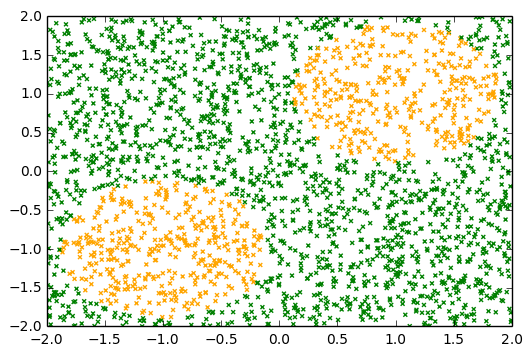

In [48]:
from sklearn import svm

print("SVM model accuracy: ")
sv3=svm.SVC(kernel='rbf')
sv3.fit(X_train, Y_train)
Y_svm3 = sv3.predict(X_test)
print(sv3.score(X_test,Y_test)) 

plt.scatter(X_test[:,0],X_test[:,1],marker ="x",\
            c=['orange' if i==1 else 'green' for i in Y_svm3],\
            s=8)
plt.ylim([-2,2])
plt.xlim([-2,2])
plt.show()
plt.clf()